In [1]:
import sys
sys.path.append('/content')


In [2]:
import numpy as np
from env import TradingEnv
from model import MLP
from agent import DQNAgent
from run import train_agent
from test import test_agent
from utils import *

In [3]:
# !pip install yfinance
# import yfinance as yf

# def get_real_stock_prices(ticker='AAPL', period='1y', interval='1d'):
#     data = yf.download(ticker, period=period, interval=interval)
#     return data['Close'].values.tolist()

In [4]:
def generate_gbm_prices(S0=100, mu=0.0002, sigma=0.01, days=100):
    prices = [S0]
    for _ in range(days - 1):
        dt = 1
        noise = np.random.normal()
        dS = prices[-1] * (mu * dt + sigma * np.sqrt(dt) * noise)
        prices.append(prices[-1] + dS)
    return prices

In [5]:
# Generate a fake price series
# prices = np.random.uniform(100, 200, size=100)
prices = generate_gbm_prices(S0=100, mu=0.0001, sigma=0.01, days=200)


In [6]:
agent, rewards = train_agent(prices, episodes=10)

Episode 1/10 — Total Reward: -17.98
Episode 2/10 — Total Reward: -24.42
Episode 3/10 — Total Reward: -85.75
Episode 4/10 — Total Reward: -10.38
Episode 5/10 — Total Reward: -40.01
Episode 6/10 — Total Reward: -57.32
Episode 7/10 — Total Reward: -86.88
Episode 8/10 — Total Reward: -57.24
Episode 9/10 — Total Reward: -32.80
Episode 10/10 — Total Reward: -79.53


In [21]:
# prices_test = np.random.uniform(100, 200, size=100)
prices_test = generate_gbm_prices(S0=100, mu=0.0001, sigma=0.01, days=200)


In [22]:
## Test
prices_log, actions_log, pnl_log, stock_owned_log = test_agent(agent, prices_test)


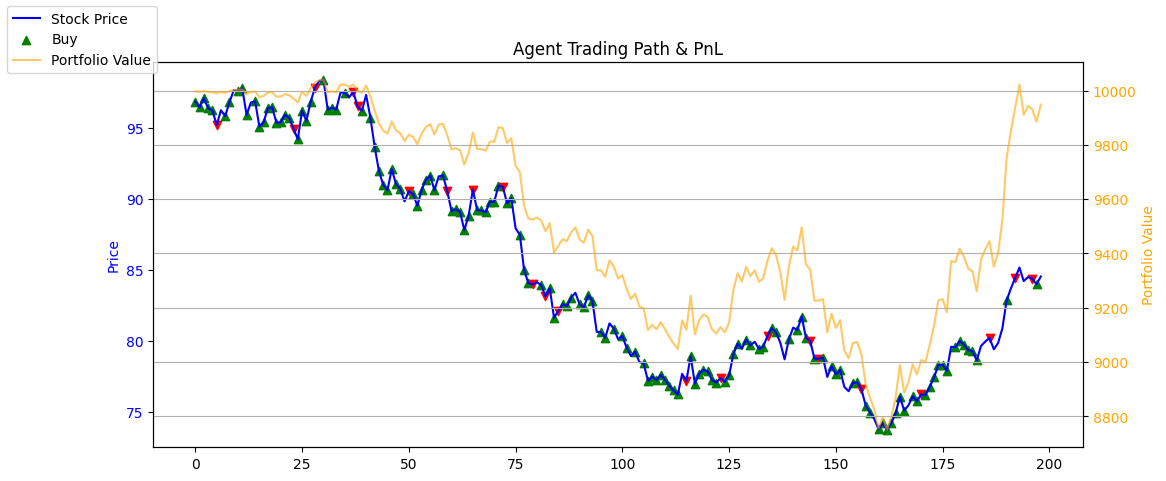

In [11]:
plot = plot_trade_path(prices_log, actions_log, pnl_log)
plot
